<a href="https://colab.research.google.com/github/Rdk-L/Projects/blob/main/AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Detetction

### Importing libraries and accessing dataset

In [ ]:
import pandas as pd
import glob
import os

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
# setting the path for joining multiple files
files = os.path.join("/content/drive/MyDrive/data/s3Files", "data*.txt")

# list of merged files returned
files = glob.glob(files)

In [ ]:
df = pd.DataFrame()

In [ ]:
for file in files:
    
    d = pd.read_csv(file,header=None)
    df = df.append(d[[1,2,3]], ignore_index=True)

df.head()

<ipython-input-8-0b9c05e59117>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d[[1,2,3]], ignore_index=True)
<ipython-input-8-0b9c05e59117>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d[[1,2,3]], ignore_index=True)
<ipython-input-8-0b9c05e59117>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d[[1,2,3]], ignore_index=True)
<ipython-input-8-0b9c05e59117>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d[[1,2,3]], ignore_index=True)
<ipython-input-8-0b9c05e59117>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

,1,2,3
0,2102,2318,97
1,2095,2326,94
2,2087,2336,78
3,1867,2429,283
4,1862,2430,297


### Preprocessing the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [ ]:
df = mms.transform(df)

In [ ]:
df = pd.DataFrame(df)
df.head()

,0,1,2
0,0.689034,0.717666,0.106946
1,0.677578,0.730284,0.103638
2,0.664484,0.746057,0.085998
3,0.304419,0.892744,0.312018
4,0.296236,0.894322,0.327453


### Splitting the dataset : 80 percent for training, 20 percent for testing

In [ ]:
train = df[:2536000]
test = df[2536000:]

In [ ]:
train.head()

,0,1,2
0,0.689034,0.717666,0.106946
1,0.677578,0.730284,0.103638
2,0.664484,0.746057,0.085998
3,0.304419,0.892744,0.312018
4,0.296236,0.894322,0.327453


In [ ]:
test.head()

,0,1,2
2536000,0.824877,0.085174,0.596472
2536001,0.831424,0.085174,0.587652
2536002,0.841244,0.085174,0.579934
2536003,0.844517,0.083596,0.579934
2536004,0.854337,0.078864,0.568908


In [ ]:
train.shape

(2536000, 3)

In [ ]:
test.shape

(634000, 3)

### K Means implementation

#### Selecting number of clusters - elbow method

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(train)
  
    distortions.append(sum(np.min(cdist(train, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / train.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(train, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / train.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

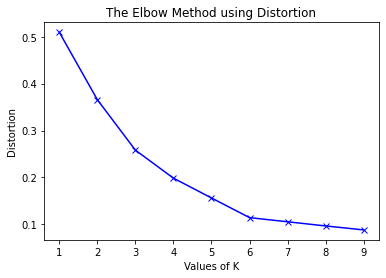

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

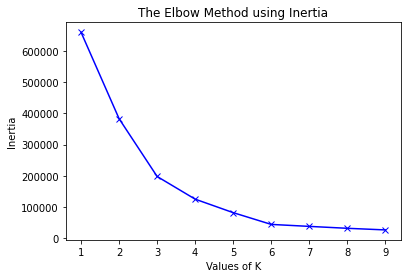

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=6).fit(train)
train[3] = kmeanModel.labels_

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-16-ab78c8f6464a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[3] = kmeanModel.labels_


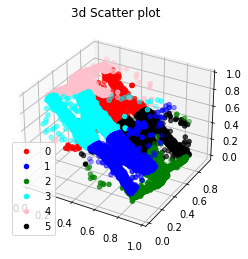

In [ ]:
# importing mplot3d toolkits
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining axes
for i,c in zip([0,1,2,3,4,5],['red','blue','green','cyan','pink','black']):
  t = train[train[3]==i]
  z = t[2]
  x = t[0]
  y = t[1]

  ax.scatter(x, y, z, c=c )

# syntax for plotting
ax.set_title('3d Scatter plot')
ax.legend(['0','1','2','3','4','5'])
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=3).fit(train)
train[4] = kmeanModel.labels_

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-25-216335e8719f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[4] = kmeanModel.labels_


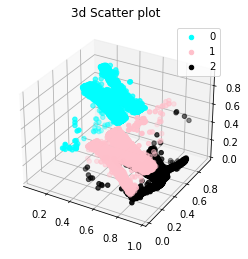

In [ ]:
fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining axes
for i,c in zip([0,1,2],['cyan','pink','black']):
  t = train[train[3]==i]
  z = t[2]
  x = t[0]
  y = t[1]

  ax.scatter(x, y, z, c=c, )

# syntax for plotting
ax.set_title('3d Scatter plot')
ax.legend(['0','1','2'])
plt.show()

#### Evaluating K Means model - silhouette coefficient

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
np.array(test)

array([[0.82487725, 0.0851735 , 0.59647189],
       [0.8314239 , 0.0851735 , 0.5876516 ],
       [0.84124386, 0.0851735 , 0.57993385],
       ...,
       [0.52209493, 0.5       , 0.51267916],
       [0.5188216 , 0.49842271, 0.5137817 ],
       [0.52536825, 0.50630915, 0.51157663]])

In [ ]:
scores = []
for i in range(2,7):
  kmeanModel = KMeans(n_clusters=i).fit(train)
  predictions = kmeanModel.predict(test)
  scores.append(silhouette_score(test, predictions, metric='euclidean'))
  

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
scores = []

In [ ]:
kmeanModel = KMeans(n_clusters=2).fit(train)
predictions = kmeanModel.predict(test)
scores.append(silhouette_score(test, predictions, metric='euclidean'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
scores

[0.4059570484808011]

In [ ]:
kmeanModel = KMeans(n_clusters=3).fit(train)
predictions = kmeanModel.predict(test)
s=silhouette_score(test, predictions, metric='euclidean')
scores.append(s)
print(s)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.47226135945345843


In [ ]:
kmeanModel = KMeans(n_clusters=4).fit(train)
predictions = kmeanModel.predict(test)
scores.append(silhouette_score(test, predictions, metric='euclidean'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeanModel = KMeans(n_clusters=5).fit(train)
predictions = kmeanModel.predict(test)
scores.append(silhouette_score(test, predictions, metric='euclidean'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
scores

[0.4059570484808011,
 0.47226135945345843,
 0.46829362524295665,
 0.468289102200217,
 0.4859428769113457]

In [ ]:
kmeanModel = KMeans(n_clusters=6).fit(train)
predictions = kmeanModel.predict(test)
scores.append(silhouette_score(test, predictions, metric='euclidean'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
scores

[0.4059570484808011,
 0.47226135945345843,
 0.46829362524295665,
 0.468289102200217,
 0.4859428769113457,
 0.5364049536272909]

In [ ]:
kmeanModel = KMeans(n_clusters=7).fit(train)
predictions = kmeanModel.predict(test)
scores.append(silhouette_score(test, predictions, metric='euclidean'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
scores

[0.4059570484808011,
 0.47226135945345843,
 0.46829362524295665,
 0.468289102200217,
 0.4859428769113457,
 0.5364049536272909,
 0.5034492690560503]

In [ ]:
scores = [0.4059570484808011,
 0.47226135945345843,
 0.46829362524295665,
 0.468289102200217,
 0.4859428769113457,
 0.5364049536272909,
 0.5034492690560503]

In [ ]:
scores.pop(3)

0.468289102200217

In [ ]:
scores

[0.4059570484808011,
 0.47226135945345843,
 0.46829362524295665,
 0.4859428769113457,
 0.5364049536272909,
 0.5034492690560503]

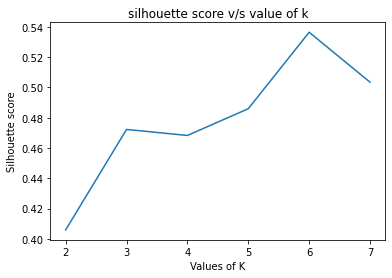

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(2,8), scores)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('silhouette score v/s value of k')
plt.show()

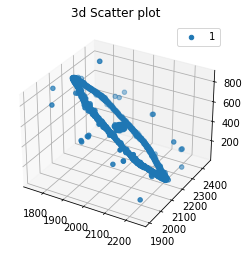

In [ ]:
fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')
z = d[3]
x = d[1]
y = d[2]

ax.scatter(x, y, z)

# syntax for plotting
ax.set_title('3d Scatter plot')
ax.legend(['1','2','3'])
plt.show()

In [ ]:
d = pd.read_csv("/content/drive/MyDrive/data/s3Files/data5.txt",header=None)
d = d[[1,2,3]]

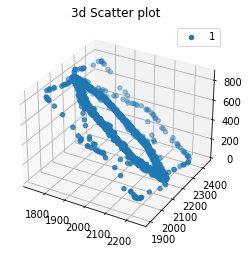

In [ ]:
fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')
z = d[3]
x = d[1]
y = d[2]

ax.scatter(x, y, z)

# syntax for plotting
ax.set_title('3d Scatter plot')
ax.legend(['1','2','3'])
plt.show()

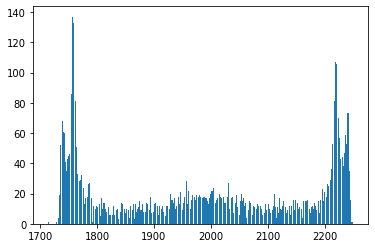

In [ ]:
i = d[1].value_counts()

plt.bar(i.index,i.values)
plt.show()

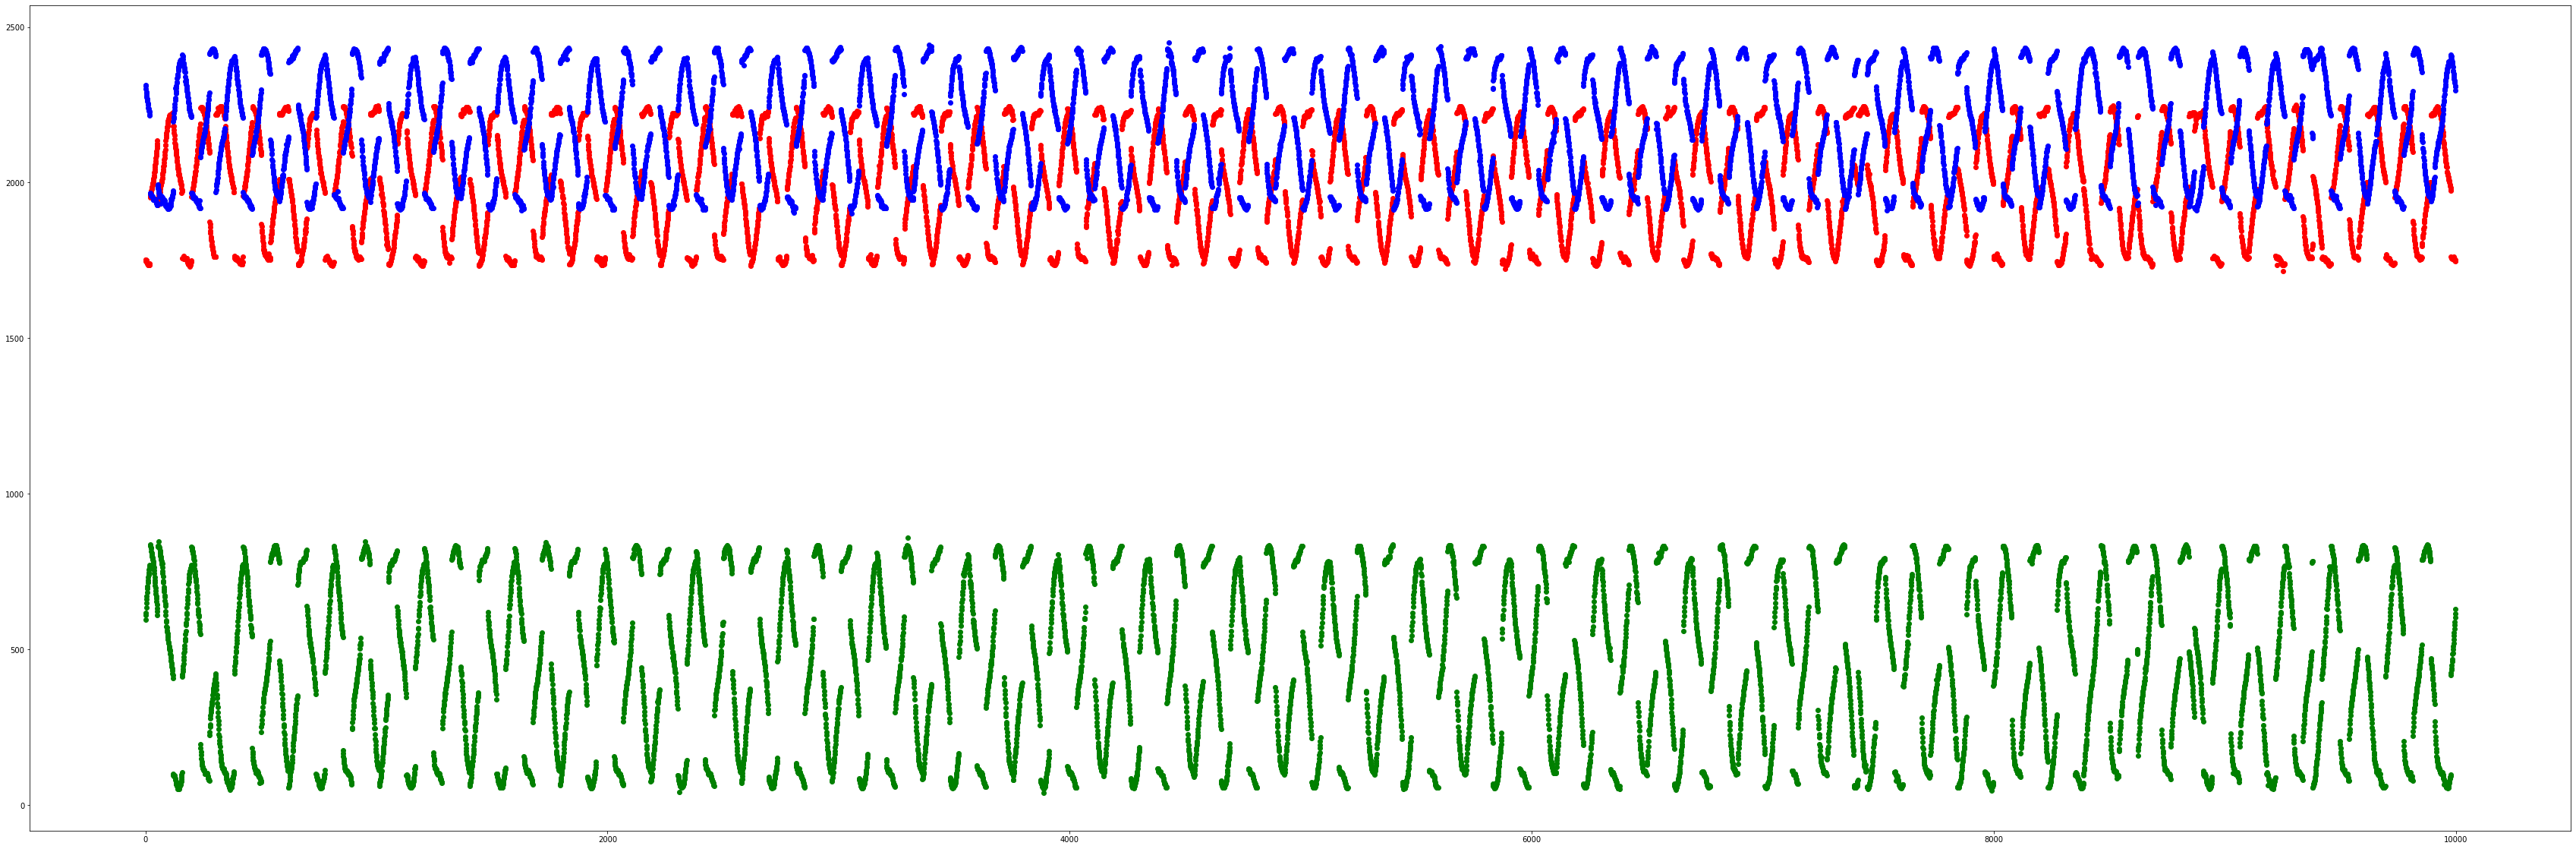

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(60,20))
#plt.plot(range(len(d[1])),d[1],color='red')
plt.scatter(range(len(d[1])),d[1],color='red')
#plt.plot(range(len(d[1])),d[2],color='blue')
plt.scatter(range(len(d[1])),d[2],color='blue')
#plt.plot(range(len(d[1])),d[3],color='green')
plt.scatter(range(len(d[1])),d[3],color='green')
plt.show()

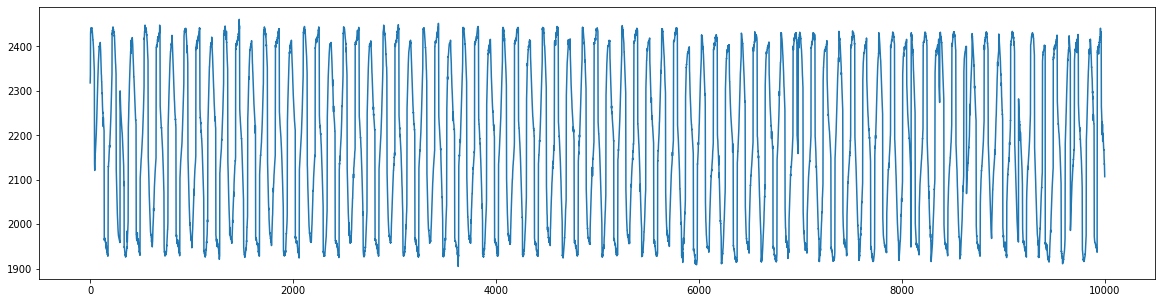

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.plot(range(len(d[2])),d[2])
plt.show()

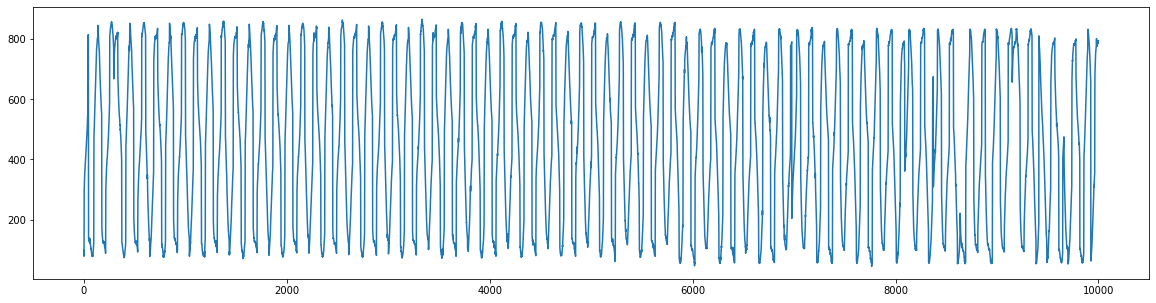

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.plot(range(len(d[3])),d[3])
plt.show()

### Autoencoder Implementation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#### Flattening the data

In [ ]:
data = np.array(df).reshape(12680,250,3)

In [ ]:
flatten_layer = tf.keras.layers.Flatten()
Data = flatten_layer(data)

In [ ]:
Data.shape

TensorShape([12680, 750])

#### Building the Deep Learning model


* Initializing the constants
* Encoding Layer 
* Decoding Layer
* Autoencoder

In [ ]:
learning_rate = 0.01
training_epochs = 50
batch_size = 256
display_step = 1
examples_to_show = 10
global_step = tf.Variable(0)
total_batch = int(len(data) / batch_size)

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
encoding_layer = 32 # final encoding bottleneck features
n_input = 750 # MNIST data input (img shape: 28*28)

In [ ]:
enocoding_1 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.sigmoid)
encoding_2 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.sigmoid)
encoding_final = tf.keras.layers.Dense(encoding_layer, activation=tf.nn.relu)

# Building the encoder
def encoder(x):
    x_reshaped = flatten_layer(x)
    # Encoder first layer with sigmoid activation #1
    layer_1 = enocoding_1(x_reshaped)
    # Encoder second layer with sigmoid activation #2
    layer_2 = encoding_2(layer_1)
    code = encoding_final(layer_2)
    return code

In [ ]:
decoding_1 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.sigmoid)
decoding_2 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.sigmoid)
decoding_final = tf.keras.layers.Dense(n_input)
# Building the decoder
def decoder(x):
    # Decoder first layer with sigmoid activation #1
    layer_1 = decoding_1(x)
    # Decoder second layer with sigmoid activation #2
    layer_2 = decoding_2(layer_1)
    decode = decoding_final(layer_2)
    return decode

In [ ]:
class AutoEncoder(tf.keras.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.n_hidden_1 = n_hidden_1 # 1st layer num features
        self.n_hidden_2 = n_hidden_2 # 2nd layer num features
        self.encoding_layer = encoding_layer
        self.n_input = n_input 

        self.flatten_layer = tf.keras.layers.Flatten()
        self.enocoding_1 = tf.keras.layers.Dense(self.n_hidden_1, activation=tf.nn.sigmoid)
        self.encoding_2 = tf.keras.layers.Dense(self.n_hidden_2, activation=tf.nn.sigmoid)
        self.encoding_final = tf.keras.layers.Dense(self.encoding_layer, activation=tf.nn.relu)
        self.decoding_1 = tf.keras.layers.Dense(self.n_hidden_2, activation=tf.nn.sigmoid)
        self.decoding_2 = tf.keras.layers.Dense(self.n_hidden_1, activation=tf.nn.sigmoid)
        self.decoding_final = tf.keras.layers.Dense(self.n_input)


    # Building the encoder
    def encoder(self,x):
        #x = self.flatten_layer(x)
        layer_1 = self.enocoding_1(x)
        layer_2 = self.encoding_2(layer_1)
        code = self.encoding_final(layer_2)
        return code
        

    # Building the decoder
    def decoder(self, x):
        layer_1 = self.decoding_1(x)
        layer_2 = self.decoding_2(layer_1)
        decode = self.decoding_final(layer_2)
        return decode

        
    def call(self, x):
        encoder_op  = self.encoder(x)
        # Reconstructed Images
        y_pred = self.decoder(encoder_op)
        return y_pred
        
def cost(y_true, y_pred):
    loss = tf.losses.mean_squared_error(y_true, y_pred)
    cost = tf.reduce_mean(loss)
    return cost

def grad(model, inputs, targets):
    #print('shape of inputs : ',inputs.shape)
    #targets = flatten_layer(targets)
    with tf.GradientTape() as tape:    
        reconstruction = model(inputs)
        loss_value = cost(targets, reconstruction)
    return loss_value, tape.gradient(loss_value, model.trainable_variables),reconstruction

#### Training the model

In [ ]:
model = AutoEncoder()
optimizer = tf.keras.optimizers.RMSprop(learning_rate)

for epoch in range(training_epochs):
    for i in range(total_batch):
        x_inp = Data[i : i + batch_size]
        loss_value, grads, reconstruction = grad(model, x_inp, x_inp)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),
              "cost=", "{:.9f}".format(loss_value))

print("Optimization Finished!")

Epoch: 0001 cost= 0.086695343
Epoch: 0002 cost= 0.086695544
Epoch: 0003 cost= 0.086692639
Epoch: 0004 cost= 0.086690240
Epoch: 0005 cost= 0.086685091
Epoch: 0006 cost= 0.086675093
Epoch: 0007 cost= 0.086650193
Epoch: 0008 cost= 0.086561024
Epoch: 0009 cost= 0.084797345
Epoch: 0010 cost= 0.074700832
Epoch: 0011 cost= 0.019813314
Epoch: 0012 cost= 0.017553935
Epoch: 0013 cost= 0.015318388
Epoch: 0014 cost= 0.016993877
Epoch: 0015 cost= 0.015222666
Epoch: 0016 cost= 0.014809877
Epoch: 0017 cost= 0.015596349
Epoch: 0018 cost= 0.014048850
Epoch: 0019 cost= 0.013970785
Epoch: 0020 cost= 0.013903070
Epoch: 0021 cost= 0.014142765
Epoch: 0022 cost= 0.014070742
Epoch: 0023 cost= 0.013419215
Epoch: 0024 cost= 0.013191053
Epoch: 0025 cost= 0.013080104
Epoch: 0026 cost= 0.012979521
Epoch: 0027 cost= 0.012839882
Epoch: 0028 cost= 0.012634150
Epoch: 0029 cost= 0.012843819
Epoch: 0030 cost= 0.012478763
Epoch: 0031 cost= 0.012552181
Epoch: 0032 cost= 0.012422295
Epoch: 0033 cost= 0.012395135
Epoch: 003

#### visualizing the cost v/s epoch

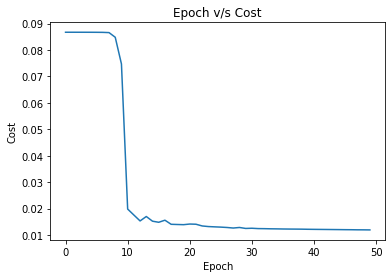

In [ ]:
cost= [0.086695343, 0.086695544, 0.086692639, 0.086690240, 0.086685091, 0.086675093, 0.086650193, 0.086561024, 0.084797345, 
       0.074700832, 0.019813314, 0.017553935, 0.015318388, 0.016993877, 0.015222666, 0.014809877, 0.015596349, 0.014048850,
       0.013970785, 0.013903070, 0.014142765, 0.014070742, 0.013419215, 0.013191053, 0.013080104, 0.012979521, 0.012839882,
       0.012634150, 0.012843819, 0.012478763, 0.012552181, 0.012422295, 0.012395135, 0.012341714, 0.012313658, 0.012271455,
       0.012243968, 0.012227491, 0.012206021, 0.012163056, 0.012133112, 0.012110059, 0.012087669, 0.012063604, 0.012040107,
       0.012011886, 0.011994647, 0.011960381, 0.011950091, 0.011921189]

plt.plot(range(50), cost)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Epoch v/s Cost')
plt.show()

In [ ]:
model.summary()

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         multiple                  0 (unused)
                                                                 
 dense_6 (Dense)             multiple                  192256    
                                                                 
 dense_7 (Dense)             multiple                  32896     
                                                                 
 dense_8 (Dense)             multiple                  4128      
                                                                 
 dense_9 (Dense)             multiple                  4224      
                                                                 
 dense_10 (Dense)            multiple                  33024     
                                                                 
 dense_11 (Dense)            multiple                 

In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [ ]:
Data[0].reshape(1,-1)

<tf.Tensor: shape=(1, 750), dtype=float32, numpy=
array([[0.68903434, 0.7176656 , 0.10694598, 0.67757773, 0.7302839 ,
        0.10363837, 0.66448444, 0.7460568 , 0.0859978 , 0.30441898,
        0.8927445 , 0.31201765, 0.29623568, 0.89432174, 0.32745314,
        0.28150573, 0.9006309 , 0.34288865, 0.26841244, 0.89589906,
        0.35501653, 0.2487725 , 0.90694004, 0.3660419 , 0.23404256,
        0.90378547, 0.37596473, 0.21931261, 0.90694004, 0.3880926 ,
        0.20785597, 0.9132492 , 0.39581037, 0.20130932, 0.9100946 ,
        0.4024256 , 0.19639935, 0.91167194, 0.4090408 , 0.18657938,
        0.9132492 , 0.41675854, 0.17839608, 0.91167194, 0.42557883,
        0.17512275, 0.91167194, 0.43109152, 0.16693944, 0.91167194,
        0.43550166, 0.16366611, 0.9132492 , 0.44211686, 0.16366611,
        0.9100946 , 0.446527  , 0.15548281, 0.90851736, 0.45314223,
        0.15384616, 0.9053628 , 0.4586549 , 0.15220949, 0.9006309 ,
        0.46527013, 0.15548281, 0.89589906, 0.46968028, 0.15057284

In [ ]:
encode_decode = model(Data[0].reshape(1,-1))
encode_decode

<tf.Tensor: shape=(1, 750), dtype=float32, numpy=
array([[0.22755903, 0.59843385, 0.6697297 , 0.21975681, 0.59668505,
        0.6586912 , 0.20513494, 0.60599303, 0.68553406, 0.2146189 ,
        0.59859794, 0.68286175, 0.21551056, 0.6129777 , 0.6812562 ,
        0.21413481, 0.574188  , 0.68453395, 0.22562605, 0.58836865,
        0.7202693 , 0.19982952, 0.5650058 , 0.722796  , 0.19575486,
        0.54961246, 0.7439853 , 0.20224223, 0.5560701 , 0.7319008 ,
        0.22665855, 0.5164062 , 0.7433452 , 0.2445319 , 0.50287855,
        0.76209813, 0.263939  , 0.4804125 , 0.7569441 , 0.2718476 ,
        0.4667408 , 0.7681208 , 0.2841749 , 0.4546228 , 0.76711965,
        0.2852299 , 0.45509684, 0.7738547 , 0.2935755 , 0.4498008 ,
        0.8016086 , 0.28374314, 0.435252  , 0.7734938 , 0.31963497,
        0.3956293 , 0.8061455 , 0.32955584, 0.39724845, 0.788546  ,
        0.34893703, 0.40133637, 0.7867186 , 0.35388952, 0.37723088,
        0.8074215 , 0.3629793 , 0.35704663, 0.8144095 , 0.36701468

In [ ]:
E = model(Data)

In [ ]:
E.numpy().reshape(-1,3).shape

(3170000, 3)

In [ ]:
E = pd.DataFrame(E.numpy().reshape(-1,3))

In [ ]:
D = pd.DataFrame(data.reshape(-1,3))

In [ ]:
D.shape, E.shape

((3170000, 3), (3170000, 3))

#### Saving the model

In [ ]:
model_json = model.to_json()
with open("/content/drive/MyDrive/data/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/data/model.h5")
print("Saved model")

Saved model


In [ ]:
from tensorflow.keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

#### Visualizing the autoencoder results for first 1000 observations

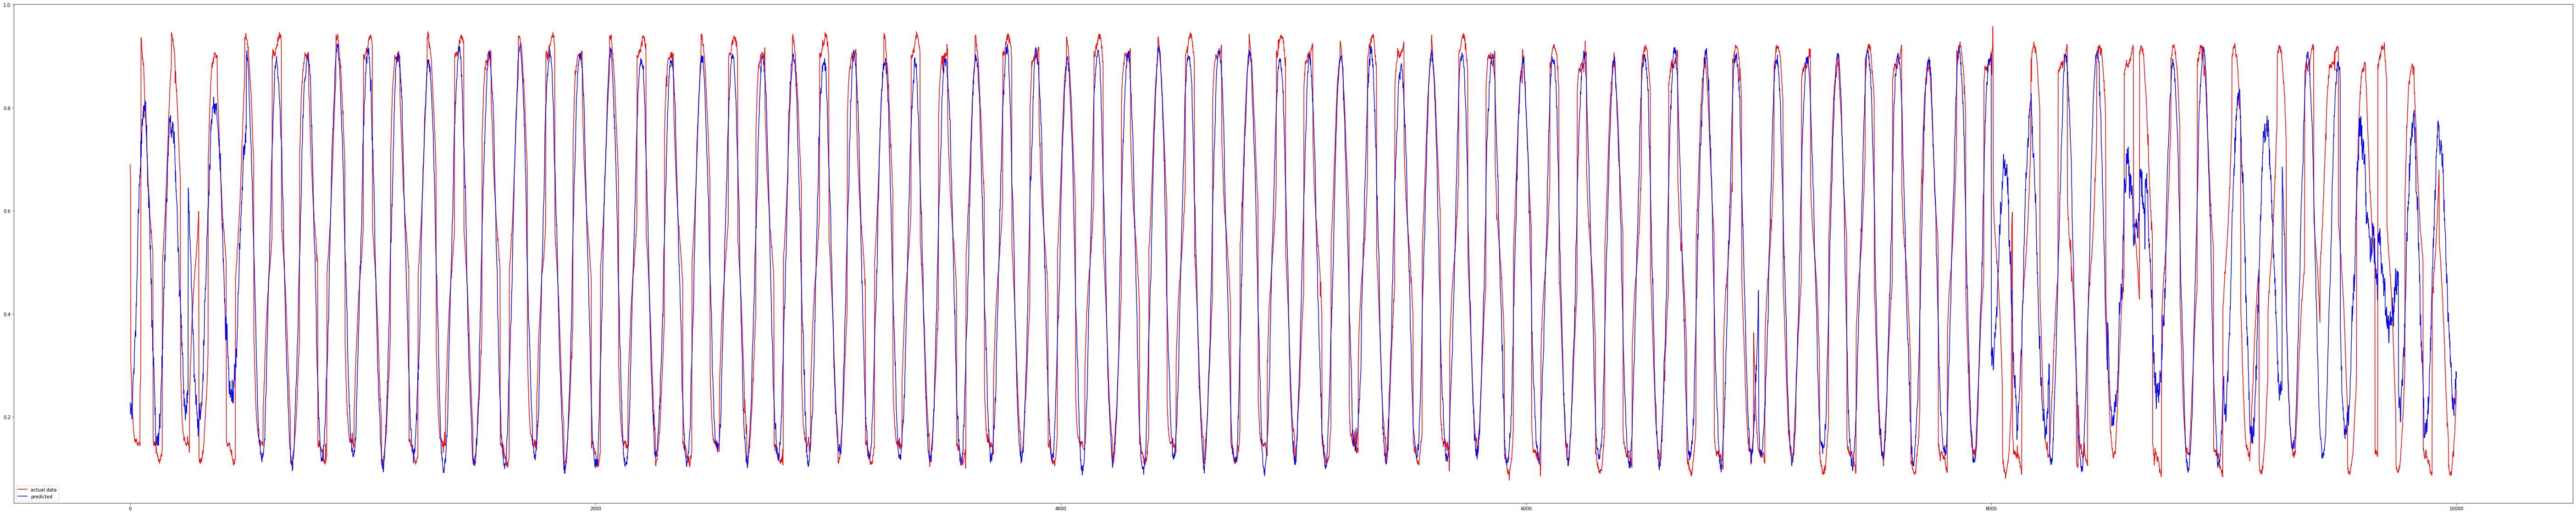

In [ ]:
fig = plt.figure(figsize=(100,20))
plt.plot(range(10000),D[0][0*10000:1*10000],color='red') # actual data 
plt.plot(range(10000),E[0][0*10000:1*10000],color='blue') # predicted
plt.legend(['actual data','predicted'],loc='lower left')
plt.show()